In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('selected_features_without_text.csv')

In [3]:
df

,Unnamed: 0,reviewID,reviewerID,restaurantID,flagged,reviewerFriendCount,reviewerNumReviews,reviewerUsefulCount,resReviewCount,resRating,...,Num_Punc,adj_count,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5
0,0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,0,0.002337,0.018008,0.001885,841,4.5,...,0.446875,0.427350,1.391395e-01,0.528655,0.868421,False,False,False,False,True
1,1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,0,0.000000,0.001149,0.000000,841,4.5,...,0.031250,0.068376,4.666667e-01,0.566667,0.263158,False,False,False,False,True
2,2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,0,0.000425,0.003831,0.000276,841,4.5,...,0.028125,0.042735,4.133333e-01,0.720000,0.473684,False,False,True,False,False
3,3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,0,0.017850,0.022605,0.001609,841,4.5,...,0.262500,0.290598,1.205482e-01,0.535201,0.868421,False,False,True,False,False
4,4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,0,0.070761,0.462835,0.075869,841,4.5,...,0.090625,0.170940,1.674603e-01,0.564683,0.868421,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26951,26951,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,0,0.006587,0.062835,0.009242,14,4.0,...,0.050000,0.051282,2.266234e-01,0.760173,0.763158,False,False,False,True,False
26952,26952,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,0,0.001275,0.003831,0.000322,15,4.0,...,0.053125,0.076923,2.692708e-01,0.608333,0.894737,False,False,False,False,True
26953,26953,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,0,0.002762,0.018391,0.002667,16,4.0,...,0.025000,0.042735,-1.190476e-01,0.588095,0.263158,False,False,True,False,False
26954,26954,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,0,0.002762,0.018391,0.002667,17,4.0,...,0.037500,0.042735,6.938894e-18,0.658333,0.552632,False,False,True,False,False


In [4]:
df.columns

Index(['Unnamed: 0', 'reviewID', 'reviewerID', 'restaurantID', 'flagged',
       'reviewerFriendCount', 'reviewerNumReviews', 'reviewerUsefulCount',
       'resReviewCount', 'resRating', 'date_diff_joinedandreviewed',
       'Num_Punc', 'adj_count', 'polarity', 'subjectivity', 'main_topic',
       'reviewRating_1', 'reviewRating_2', 'reviewRating_3', 'reviewRating_4',
       'reviewRating_5'],
      dtype='object')

In [5]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

def evaluate(clf, X_train, X_test, y_train, y_test): 
    for i in range(2):
        if i == 0:
            print("\n===== Performance on Training Set =====\n")
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_train)
            # Confusion matrix
            cmn = metrics.confusion_matrix(y_train, y_pred, normalize='true') 
            sns.heatmap(cmn, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
            plt.title("Confusion Matrix")
            plt.ylabel("Actual")
            plt.xlabel("Predicted")
            plt.show()
            print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_train, y_pred)))
            print(metrics.classification_report(y_train, y_pred)) 
            y_pred_proba_model = clf.predict_proba(X_train)[::, 1]
            fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_proba_model)
            auc_train = metrics.roc_auc_score(y_train, y_pred_proba_model)
        else:
            print("\n===== Performance on Testing Set =====\n")
            model_name = type(clf).__name__
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            # Confusion matrix
            cmn = metrics.confusion_matrix(y_test, y_pred, normalize='true')
            sns.heatmap(cmn, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
            plt.title("Confusion Matrix")
            plt.ylabel("Actual")
            plt.xlabel("Predicted")
            plt.show()
            print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred))) 
            print(metrics.classification_report(y_test, y_pred))
            y_pred_proba_model = clf.predict_proba(X_test)[::, 1]
            fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_pred_proba_model)
            auc_test = metrics.roc_auc_score(y_test, y_pred_proba_model)
            
    # Plot ROC curve for both training and testing sets
    plt.figure(figsize=(8, 5))
    plt.plot(fpr_train, tpr_train, label="Training Set AUC: {:.2f}".format(auc_train))
    plt.plot(fpr_test, tpr_test, label="Testing Set AUC: {:.2f}".format(auc_test))
    plt.legend(loc=4, title='Models', facecolor='white')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC', size=15)
    plt.show()


Train Test Split

In [7]:
from sklearn.model_selection import GroupShuffleSplit

# remove target variable
X = df.drop(['flagged'], axis=1) 

y = df.flagged

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
split = splitter.split(X, groups=X['reviewerID'])
train_inds, test_inds = next(split)

X_train = X.iloc[train_inds]
X_test = X.iloc[test_inds]
y_train = y.iloc[train_inds]
y_test = y.iloc[test_inds]

# remove non-numerical variables from X sets
X_train = X_train.drop(['Unnamed: 0', 'reviewID', 'reviewerID', 'restaurantID'], axis=1)

X_test = X_test.drop(['Unnamed: 0', 'reviewID', 'reviewerID', 'restaurantID'], axis=1)

In [8]:
X_train.columns

Index(['reviewerFriendCount', 'reviewerNumReviews', 'reviewerUsefulCount',
       'resReviewCount', 'resRating', 'date_diff_joinedandreviewed',
       'Num_Punc', 'adj_count', 'polarity', 'subjectivity', 'main_topic',
       'reviewRating_1', 'reviewRating_2', 'reviewRating_3', 'reviewRating_4',
       'reviewRating_5'],
      dtype='object')

Logistic Regression Model (OHE)


===== Performance on Training Set =====



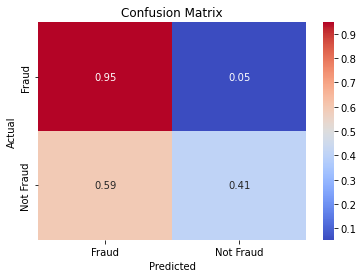

Accuracy = 0.82104
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16467
           1       0.70      0.41      0.52      5007

    accuracy                           0.82     21474
   macro avg       0.77      0.68      0.70     21474
weighted avg       0.81      0.82      0.80     21474


===== Performance on Testing Set =====



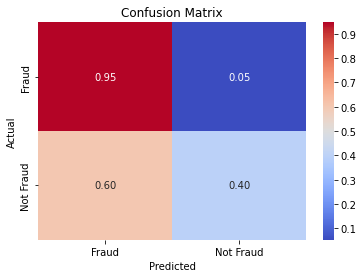

Accuracy = 0.82671
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4285
           1       0.68      0.40      0.50      1197

    accuracy                           0.83      5482
   macro avg       0.76      0.67      0.70      5482
weighted avg       0.81      0.83      0.81      5482



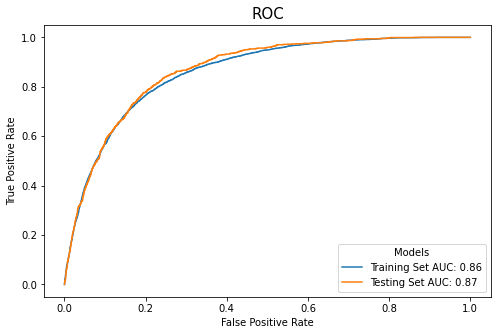

In [9]:
logit_model = LogisticRegression(max_iter=10000)
evaluate(logit_model, X_train, X_test, y_train, y_test)

Results Analysis

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred_ohe))
print('-----------------------------------------------------')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ohe))
print('-----------------------------------------------------')
print("Classification Report:\n", classification_report(y_test, y_pred_ohe))

Accuracy: 0.8276176577891281
-----------------------------------------------------
Confusion Matrix:
 [[4057  228]
 [ 717  480]]
-----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4285
           1       0.68      0.40      0.50      1197

    accuracy                           0.83      5482
   macro avg       0.76      0.67      0.70      5482
weighted avg       0.81      0.83      0.81      5482



Logistic Regression Model (Rating)

In [45]:
model_rating = LogisticRegression(max_iter=10000)
model_rating.fit(X_train_rating, y_train)

y_pred_rating = model_rating.predict(X_test_rating)

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred_rating))
print('-----------------------------------------------------')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rating))
print('-----------------------------------------------------')
print("Classification Report:\n", classification_report(y_test, y_pred_rating))

Accuracy: 0.8267055819044145
-----------------------------------------------------
Confusion Matrix:
 [[4058  227]
 [ 723  474]]
-----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4285
           1       0.68      0.40      0.50      1197

    accuracy                           0.83      5482
   macro avg       0.76      0.67      0.70      5482
weighted avg       0.81      0.83      0.81      5482



In [48]:
model_all = LogisticRegression(max_iter=10000)
model_all.fit(X_train_all, y_train)

y_pred_all = model_all.predict(X_test_all)

print("Accuracy:", accuracy_score(y_test, y_pred_all))
print('-----------------------------------------------------')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_all))
print('-----------------------------------------------------')
print("Classification Report:\n", classification_report(y_test, y_pred_all))

Accuracy: 0.8287121488507844
-----------------------------------------------------
Confusion Matrix:
 [[4064  221]
 [ 718  479]]
-----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4285
           1       0.68      0.40      0.51      1197

    accuracy                           0.83      5482
   macro avg       0.77      0.67      0.70      5482
weighted avg       0.81      0.83      0.81      5482

